<a href="https://colab.research.google.com/github/BrunoAzambuja/Classificacao_com_AutoML_em_manutencao_preditiva_de_maquinas/blob/main/Classifica%C3%A7%C3%A3o_com_AutoML_em_manuten%C3%A7%C3%A3o_preditiva_de_m%C3%A1quinas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação com AutoML em manutenção preditiva de máquinas
#### Biblioteca open-source e low-code aplicada em previsão de falhas do tipo binária e multiclasse.

*by [Bruno Azambuja](https://www.brunoazambuja.com/)*



<p align=center>
<img src="https://device-insight.com/wp-content/uploads/2018/03/Predictive-Maintenance-e1644243465650.jpg
" width="80%"></p>

###**PyCaret**

A ferramenta de Auto Machine Learning escolhida para fazer os modelos de classificações no *dataset* de manutenção preditiva em máquinas será o PyCaret. O PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o templo entre o ciclo de uma hipótese e os insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Em comparação com outras bibliotecas do tipo, o PyCaret traz o diferencial de ser *low-code*, isto é, demanda pouco código para que opere de forma robusta. 

Todas as operações realizadas com o PyCaret estão carregadas em um pipeline que está pronto para o deploy. Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais. 


<p align="center"><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="40%"></p>

# Entendendo os objetivos

O objetivo desse projeto é prever a falha de máquinas (binária) assim como do seu tipo de falha (multiclasse), propondo soluções eficientes de Machine Learning com o uso do PyCaret. 

Além disso este estudo visa à contextualização do problema e à análise completa dos dados como base para insights que possam direcionar ações de melhoria do desempenho do negócio.

# Instalando as bibliotecas

Primeiramente vamos instalar as bibliotecas e importar todos os pacotes necessários para este estudo.

Lembrando que, por padrão, o PyCaret não faz parte do conjunto de bibliotecas pré-instaladas do Google Colab. Por isso, é importante que sempre que formos trabalhar com ele por aqui, façamos a instalação da biblioteca.

Além disso, precisamos ativar o modo Colab. Assim, conseguiremos utilizar as biblioteca aqui no Colab.

In [ ]:
# instalando o PyCaret
!pip install pycaret -q

In [ ]:
# configurando para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [ ]:
# importar pacotes adicionais necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import joblib
from joblib import dump, load
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
# importar pacotes do PyCaret necessários
from pycaret.classification import setup, compare_models, models, create_model, predict_model
from pycaret.classification import tune_model, plot_model, evaluate_model, finalize_model
from pycaret.classification import save_model, load_model

# Importando os dados

Este conjunto de dados reflete a manutenção preditiva real encontrada na indústria com medições de equipamentos reais. A descrição dos recursos é obtida diretamente da fonte do conjunto de dados.

Os dados utilizados neste projeto foram originalmente disponibilizados na página do [Kaggle](https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification), nela se tem acesso aos dados fonte do estudo.

Primeiro, vamos importar os dados dos produtos para entender melhor o que temos em nossas mãos.

In [ ]:
# importando os dados para um dataframe
path = ('/content/predictive_maintenance.csv')
df = pd.read_csv(path)

# visualizando as 5 primeiras entradas
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


As seis *features* do modelo serão:
* `Type`: a qualidade do produto, composta por uma letra L, M ou H. Significa baixo, médio e alto, respectivamente;
* `Air temperature [K]`: gerada usando um processo de caminhada aleatória posteriormente normalizado para um desvio padrão de 2 K em torno de 300 K;
*  `Process temperature [K]`: gerada usando um processo de caminhada aleatória posteriormemte normalizado para um desvio padrão de 1 K, adicionado à temperatura do ar mais 10K;
* `Rotation speed [rpm]`: calculada a partir da potência de 2860 W, sobreposta com um ruído normalmente distribuído.
* `Torque [Nm]`: os valores de torque são normalmente distribuídos em torno de 40 Nm com um Ïƒ = 10 Nm e sem valores negativos.
* `Tool wear [min]`: As variantes de qualidade H/M/L adicionam 5/3/2 minutos de desgaste da ferramenta à ferramenta utilizada no processo.

Os *targets* são:
* `Target`: falha ou não falha (para realizar a classificação binária).
* `Failure Type`: tipo de falha (para realizar a classificação multiclasse).

Também inclui as seguintes informações, que não são úteis para a construção dos modelos:
* `UID`: identificador geral que varia de 1 a 10.000;
* `ProductID`: identificador exclusivo dos produtos com um número de série específico.

Com os dados importados para dentro das estruturas dataframes, pode-se iniciar uma preparação dos dados e na sequência uma análise exploratória dos dados a fim de buscar insights propostos inicialmente.

# Exploratory Data Analysis (EDA)

Esta etapa foi dividida entre tópicos que visam tirar insights e elevar a consciência situacional a respeito do *dataframe* da manutenção preditiva real encontrada na indústria com medições de equipamentos reais. Sendo assim, a análise exploratória tem por objetivo  permitir um entendimento de como os dados estão estruturados.

Este é um processo crítico que visa realizar investigações iniciais nos dados para descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas resumidas e representações gráficas.

###**Características**

Com os dados importados, conseguimos identificar as suas principais caracteríscas, para que assim possamos preparar os dados para as etapas seguintes do estudo. Nesta etapa serão realizadas algumas verificações para identificar possíveis dados discrepantes, para que assim possamos ajustá-los.

In [ ]:
# vendo as primeiras e últimas entradas
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


A visualização das 5 primeiras e as 5 últimas entradas já permite entender como os *dataframes* estão compostos.

Como se verifica acima, o *dataframe* de produtos é composto de 10.000 entradas e 10 variáveis.

In [ ]:
# checando as caracteriticas dos dados
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# checando valores únicos
print(f"{df['UDI'].nunique()} unique values for 'UDI'")
print(f"{df['Product ID'].nunique()} unique value for 'Pruduct ID'")

10000 unique values for 'UDI'
10000 unique value for 'Pruduct ID'


Insights rápidos:



Neste primeiro momento, podemos identificar algumas das principais características do *dataset*, conseguindo tirar *insights* rápidos como:

* Existem 10.000 entradas e 10 variáveis no conjunto de dados;
* A variável `Target` são uns (1) e zeros (0);
* A variável `UDI` parece ser um número de índice e a `Product ID` é um número de identificação do produto. Assim, essas variáveis podem ser removidas do *dataframe*.

###**Balanceamentos**

Por fim, nesta análise exploratória, vamos ver o balanceamento das classes do *dataframe* quanto às suas *features*, a fim de identificar se os dados podem estar com algum tipo de bias (viés). Além disso, buscamos gerar insights de negócio e elevar a consciência situacional a respeito das medições realizadas nas máquinas.

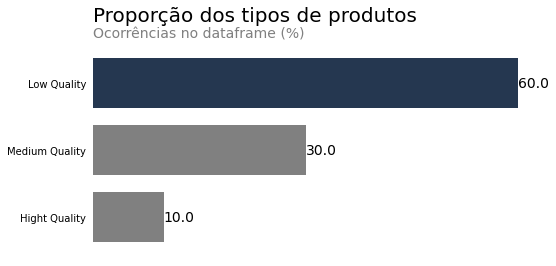

In [ ]:
# agrupando porcentagem de cada tipo de imóveis e classificando
y = df.replace({'Type': {'L': 'Low Quality', 'M': 'Medium Quality', 'H': 'Hight Quality'}})
y = (y.Type.value_counts().sort_values()/ df.shape[0]*100)

# arredondando valores
y = round(y, 1)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(8,4))
y.plot(kind="barh", ax=ax, color=["gray", "gray","#253750"], width=0.75)
plt.title("Proporção dos tipos de produtos", fontsize=20, pad=20, loc="left")
plt.suptitle("Ocorrências no dataframe (%)", color = "gray", fontsize= 14, x=0.125, y=0.93, ha="left")


# adicionando valores nas barras
for index, value in enumerate(y): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

Acima podemos observar uma concentração bem maior de produtos do tipo baixa qualidade (L) no *dataframe*. Desta forma podemos dizer que há um número superior de produtos de baixa qualidade se compararmos com o número de produtos de alta qualidade contidos neste *dataframe*.

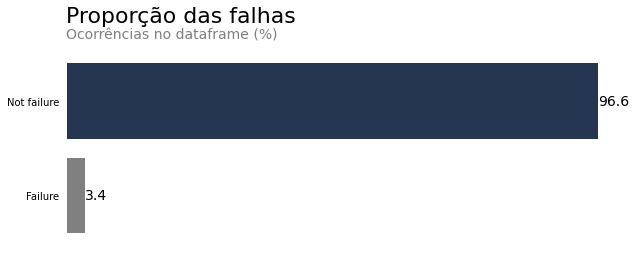

In [ ]:
# agrupando porcentagem de cada tipo de imóveis e classificando
y = df.replace({'Target': {0: 'Not failure', 1: 'Failure'}})
y = (y['Target'].value_counts().sort_values()/ df.shape[0]*100)

# arredondando valores
y = round(y, 1)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(10,4))
y.plot(kind="barh", ax=ax, color=["gray","#253750"], width=0.8)
plt.title("Proporção das falhas", fontsize=22, x=0.205, y=1.05)
plt.suptitle("Ocorrências no dataframe (%)", color = "gray", fontsize= 14, x=0.271, y=0.92)

# adicionando valores nas barras
for index, value in enumerate(y): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

Este *dataframe* apresenta uma quantidade de produtos sem falhas bem superior aos casos de produtos com falha. No momento em que formos configurar o ambiente no PyCaret usaremos o recurso conhecido como `fix_imbalance=True` por conta deste desbalanceamento da variável alvo.

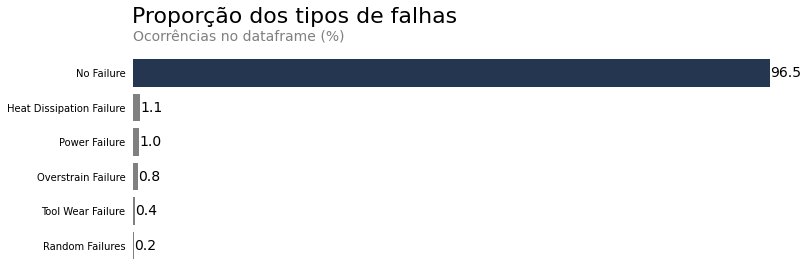

In [ ]:
# agrupando porcentagem de cada tipo de imóveis e classificando
y = (df['Failure Type'].value_counts().sort_values()/ df.shape[0]*100)

# arredondando valores
y = round(y, 1)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(12,4))
y.plot(kind="barh", ax=ax, color=["gray", "gray", "gray", "gray", "gray","#253750"], width=0.8)
plt.title("Proporção dos tipos de falhas", fontsize=22, x=0.242, y=1.1)
plt.suptitle("Ocorrências no dataframe (%)", color = "gray", fontsize= 14, x=0.248, y=0.95)

# adicionando valores nas barras
for index, value in enumerate(y): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

Como o gráfico acima indica, a proporção de produtos que não apresentaram falhas é bem superior aos produtos que apresentaram algum tipo de falha. Também podemos dizer que há um balanceamento entre as quantidades dos demais tipos de falhas encontradas nos produtos.

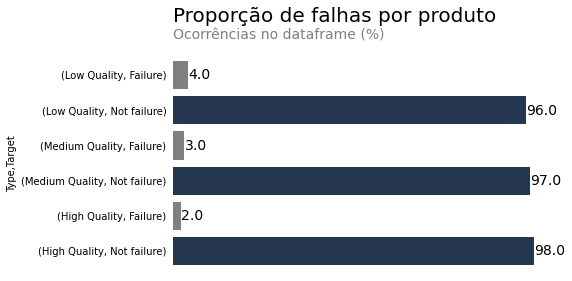

In [ ]:
# agrupando porcentagem de cada tipo de imóveis e classificando
y = df.replace({'Target': {0: 'Not failure', 1: 'Failure'}})
y = y.replace({'Type': {'L': 'Low Quality', 'M': 'Medium Quality', 'H': 'High Quality'}})
y_order = ["High Quality", "Medium Quality", "Low Quality"]
y = (y.groupby(["Type"])["Target"].value_counts(normalize=True)*100).loc[y_order]

# arredondando valores
y = round(y, 0)

# gerando os elementos do gráfico de barras
fig, ax = plt.subplots(figsize=(8,4))
y.plot(kind="barh", ax=ax, color=["#253750", "gray"], width=0.8)
plt.title("Proporção de falhas por produto", fontsize=20, x=0.425, y=1.11)
plt.suptitle("Ocorrências no dataframe (%)", color = "gray", fontsize= 14, x=0.49, y=0.89)

# adicionando valores nas barras
for index, value in enumerate(y): 
    plt.text(value, index, str(value), color="black", verticalalignment="center", fontsize=14) 

# removendo visibilidade do fundo
for item in [fig, ax]:
    item.patch.set_visible(False)

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)

# plotado o gráfico
fig.tight_layout()
plt.show()

O gráfico acima confirma que na medida em que a qualidade do produto aumenta, aumenta também o número de produtos sem falhas. Então podemos afirmar que o padrão de qualidade previamente estabelecido aos produtos se confirmou em seu uso.

###**Correlações**

Por fim, agora vamos ver as correlações das *features* dos *dataframes* para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns insights do negócio. É possível ver abaixo uma correlação geral das features, pelo método `pairplot`.

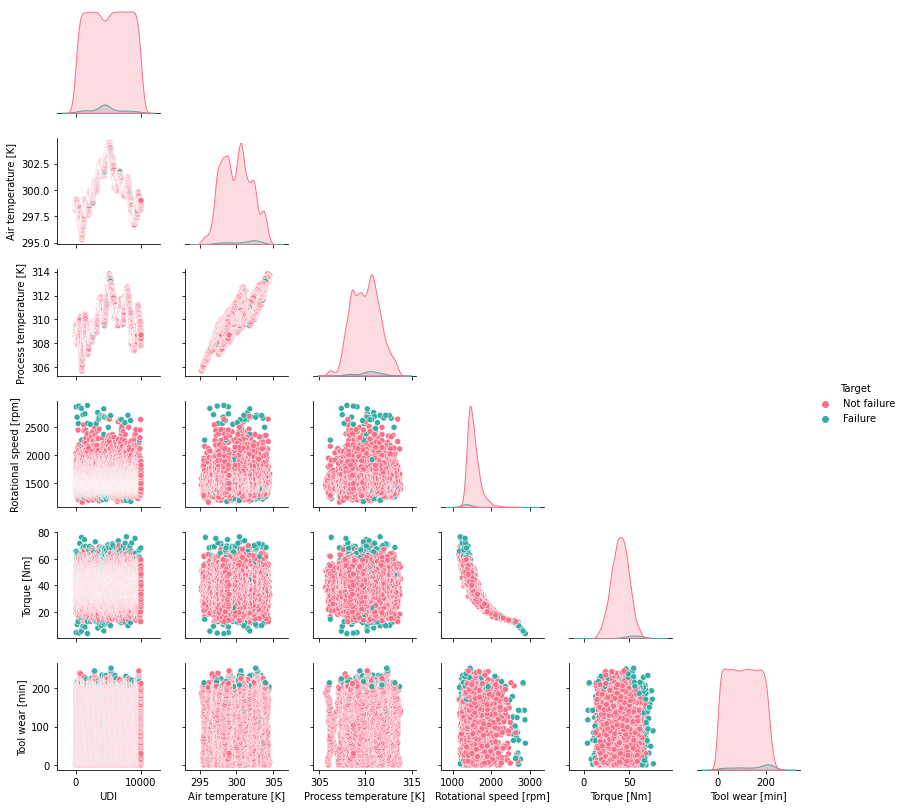

In [ ]:
# corrigindo descrição dos dados
y = df.replace({'Target': {0: 'Not failure', 1: 'Failure'}})

# gerando os gráficos de correlações do dataframe
sns.pairplot(y, hue='Target', palette='husl', height=1.9, corner=True);

Conforme os gráficos acima, podemos tirar os seguintes insights:

* A temperatura do processo (`Process temperature [K]`) e a temperatura do ar (`Air temperature [K]`) estão altamente correlacionadas;

* O torque (`Torque [Nm]`) e a velocidade de rotação (`Rotational speed [rpm]`) também são altamente correlacionados;

* Nas demais correlações de *features*, vemos imediatamente que as falhas ocorrem para valores extremos de algumas características, ou seja, o maquinário falha tanto para os menores quanto para os maiores valores de torque e velocidade de rotação. Isso é facilmente identificado no gráfico, pois os pontos verdes estão distantes para esses recursos. Então, existe uma faixa para as condições normais em que as máquinas operam, e acima ou abaixo desta faixa, elas tendem a falhar.

Baseados nesses insights, agora vamos detalhar um pouco mais os gráficos em que conseguimos observar as altas correlações, estratificando a análise por tipo de falhas para os dois primeiros casos relatados:

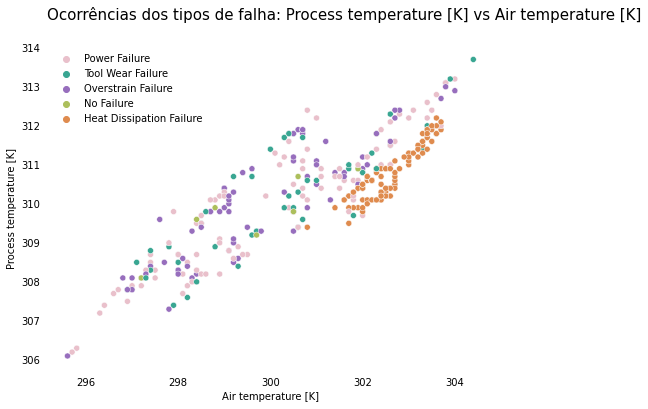

In [ ]:
# gerando o gráfico
fig, ax = plt.subplots(figsize=[8,6])
sns.scatterplot(data=df[df['Target'] == 1], x='Air temperature [K]', y='Process temperature [K]', hue='Failure Type', palette=['#E9C0CB', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'])

# adicionando o título
ax.set_title('Ocorrências dos tipos de falha: Process temperature [K] vs Air temperature [K]', fontsize=15, pad=25, loc="left")

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

Conforme o gráfico acima, podemos tirar os seguintes insights:

* A falha de dissipação de calor (`Heat Dissipation Failure`) ocorre tanto para temperatura de processo como do ar estão mais altas. É o tipo de falha que surge com temperaturas mais altas, como a temperatura de processo (`Process temperature [K]`) acima de 310 K e a temperatura de ar (`Air temperature [K]`) acima de 301 K;

* De um modo geral, podemos dizer que, quando a temperatura do processo está maior que a temperatura do ar, os equipamentos tendem a falhar, o que pode indicar que o aumento da temperatura do processo está diretamente relacionada às falhas dos produtos.

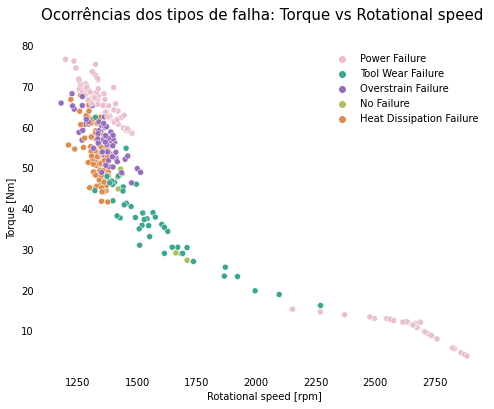

In [ ]:
# gerando o gráfico
fig, ax = plt.subplots(figsize=[8,6])
sns.scatterplot(data=df[df['Target'] == 1], x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type', palette=['#E9C0CB', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'])

# adicionando o título
ax.set_title('Ocorrências dos tipos de falha: Torque vs Rotational speed', fontsize=15, pad=25, loc="left")

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=True) 
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

Conforme o gráfico acima, podemos tirar os seguintes insights:

* A falha de energia (`Power failure`) ocorre tanto para velocidade/torque rotacional mais baixa quanto mais alta. É o tipo de falha com maior velocidade de rotação (acima de 2500rpm) e menor torque (abaixo de cerca de 15Nm);

* Entre os torques 16Nm e 41Nm todas as falhas são desgaste da ferramenta (`Tool Wear Failure`);

* As falhas por sobrecarga (`Overstrain Failure`) ocorrem com torques que variam entre 47 e 68 Nm) e velocidades de rotação de 1200 a 1500 rpm aproximadamente;

* Para falhas de dissipação de calor (`Heat Dissipation Failure`), a faixa de torque é menor e a faixa de velocidade de rotação é maior em comparação com falhas de sobrecarga.

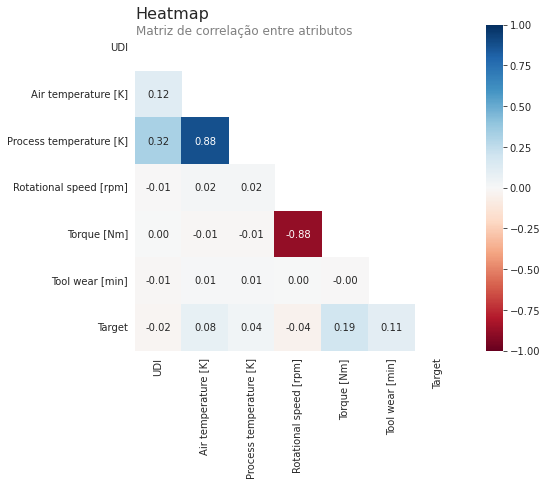

In [ ]:
# criar uma matriz de correlação
corr = df.corr()

# plotar um heatmap a partir das correlações
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# definindo parâmetros
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 6))
    ax = sns.heatmap(corr, cmap='RdBu', fmt='.2f', mask=mask, vmax=1, vmin=-1, square=True, annot=True)

# adicionando títulos
plt.title("Heatmap", fontsize=16, x=0, y=1.5, loc="left")
plt.suptitle("Matriz de correlação entre atributos", color = "gray", fontsize=12, x=0.243, y=0.88, ha="left");

Acima, conforme podemos ver no *heatmap* e como mencionado anteriormente, existe uma alta correlação entre a temperatura do processo e a temperatura do ar, indicando uma correlação forte positiva. Também podemos observar entre o torque e a velocidade de rotação, que neste caso é uma correlação forte negativa.

###**Distribuições**

Por fim, agora vamos ver as distribuições das *features* do *dataframe*. Para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns insights do negócio. É possível ver abaixo uma distribuição geral das features, pelo métodos `histplot` e `boxplot`:

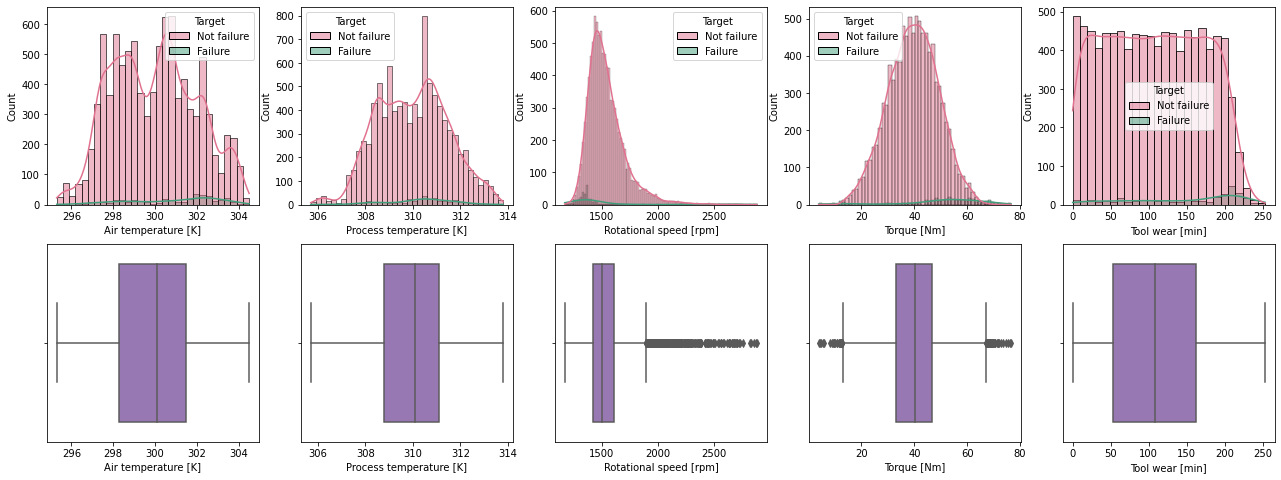

In [ ]:
# corrigindo descrição dos dados
y = df.replace({'Target': {0: 'Not failure', 1: 'Failure'}})

# definindo parâmetros
fig, axes = plt.subplots(2, 5, figsize=[22,8])
j = 0
colors = ['#E1728F', '#409E7D']

# gerando os gráficos
for i in ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']:
    sns.histplot(data=y, x=i, kde=True, ax=axes[0,j], hue='Target', palette=colors)
    sns.boxplot(data=y, x=i, ax=axes[1,j], palette=['#976EBD'])
    j+=1

Conforme o gráfico acima, podemos tirar os seguintes insights:

* A velocidade de rotação (`Rotational speed [rpm]`) é assimétrica positivamente;
* Nos boxplots, podemos ver que a velocidade de rotação (`Rotational speed [rpm]`) e o torque (`Torque [Nm]`) têm valores discrepantes.

Vamos verificar esses possíveis *outliers* analisando os boxplots:

In [ ]:
# função para calcular os valores máximos e mínimos do boxplot
def maximum_box(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + 1.5*IQR
    minimum = Q1 - 1.5*IQR
    return maximum, minimum

for i in ['L', 'M', 'H']:
    df_product_type = df[df['Type'] == i]
    max_rotational_speed, min_rotational_speed = maximum_box(df_product_type['Rotational speed [rpm]'])
    max_torque, min_torque = maximum_box(df_product_type['Torque [Nm]'])
    print('Valores do boxplot por tipo de produto ' + i + ':')
    print(f'Valor máximo permitido de torque: {round(max_torque,2)}')
    print(f'Valor mínimo permitido de torque: {round(min_torque,2)}')
    print(f'Valor máximo permitido de velocidade de rotação: {round(max_rotational_speed,2)}')
    print(f'Valor mínimo permitido de velocidade de rotação: {round(min_rotational_speed,2)}')
    print('='*20)

Valores do boxplot por tipo de produto L:
Valor máximo permitido de torque: 67.2
Valor mínimo permitido de torque: 12.8
Valor máximo permitido de velocidade de rotação: 1894.0
Valor mínimo permitido de velocidade de rotação: 1142.0
Valores do boxplot por tipo de produto M:
Valor máximo permitido de torque: 67.05
Valor mínimo permitido de torque: 13.05
Valor máximo permitido de velocidade de rotação: 1897.0
Valor mínimo permitido de velocidade de rotação: 1137.0
Valores do boxplot por tipo de produto H:
Valor máximo permitido de torque: 67.0
Valor mínimo permitido de torque: 12.6
Valor máximo permitido de velocidade de rotação: 1893.75
Valor mínimo permitido de velocidade de rotação: 1143.75


Conforme os dados acima, podemos tirar os seguintes insights: 

* A faixa operacional de torque e a velocidade de rotação são semelhantes para todos os tipos de produtos;

* Valores acima do máximo e abaixo do mínimo podem ser outliers, mas não necessariamente.

Com os parâmetros de processo informados acima podemos ajustar os produtos dentro dos valores de regulagem necessários para mitigar as suas respectivas falhas. Desta forma, esta análise exploratória nos proporcionou significativos insights para a melhoria do desempenho de qualidade dos produtos, podendo ser complementado aos insights do modelo de machine learning deste estudo.

# Preparando os dados

Esta etapa consiste em preparar o nosso conjunto de dados para a construção do modelo. Nesta seção, executaremos as seguintes etapas de tratamento:

* Limpeza dos dados:
  * Preencher ou eliminar as linhas com valores faltantes;
  * Eliminar valores duplicados;
  * Tratar ou remover outliers.
* Seleção dos atributos:
  * Eliminar os *features* (atributos) que não contêm informações úteis.
* Feature Engineering*:
  * Aplicar transformações às variáveis;
  * Discretizar variáveis contínuas;
  * Decompor *features* categóricas;
  * Agregar *features* para gerar novas.
* *Spliting data*:
  * Dividir o conjunto de dados entre dados de treinamento e teste.

###**Limpeza dos dados**

**Valores ausentes**

Na função abaixo, conseguimos verificar de outra forma que não há valores ausentes neste *dataframe*.

In [ ]:
# checando os valores ausentes
df.isnull().sum().sort_values(ascending=False)

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

Quanto à qualidade do dataset, este não apresentou valores ausentes nas suas respectivas colunas.

**Valores duplicados**

Esta é uma etapa importante a ser verificada para reduzirmos os ruídos neste tipo de trabalho.

In [ ]:
# verificando a existência de dados duplicados
duplicated = df[df.duplicated().values]
duplicated

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type


Como podemos observar, o *dataframe* não apresentou dados duplicados.

Sendo assim, com a etapa de limpeza de dados e todas as respectivas verificações realizadas, podemos seguir para próxima etapa conhecida como seleção de atributos. 

###**Seleção de atributos**

Aqui vamos remover as *features* que não serão necessárias para os modelos. Conforme verificamos tanto as *features* `UDI` e `Product ID` podem ser excluídas:

In [ ]:
# removendo a variável 'UDI' e 'Product ID' do dataframe
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

###**Feature Engineering**

Aqui vamos aplicar transformações sobre os *dataframes* a fim de deixarmos eles em plenas condições para que possamos aplicá-los no modelo de machine learning.

**Aplicando transformação das variáveis**

Aqui vamos fazer uma conjunto de transformações. Primeiramente vamos alterar o nome das colunas para que fiquem conforme o sistema internacional de medidas:

In [ ]:
# transformando o nome das colunas
df = df.rename(mapper={'Air temperature [K]': 'Air_temperature', 
                       'Process temperature [K]': 'Process_temperature', 
                       'Rotational speed [rpm]': 'Rotational_speed', 
                       'Torque [Nm]': 'Torque', 
                       'Tool wear [min]':'Tool_wear',
                       'Target':'Failure_binary',
                       'Failure Type':'Failure_multiclass'}, axis=1)

Agora vamos transformar os valores das colunas de temperatura de kelvin para grau celsius:

In [ ]:
# Convertendo as temperaturas (1 K = -272.15 °C)
df["Air_temperature"] = df["Air_temperature"] - 272.15
df["Process_temperature"] = df["Process_temperature"] - 272.15

# verificando o dataframe
df.head()

,Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_binary,Failure_multiclass
0,M,25.95,36.45,1551,42.8,0,0,No Failure
1,L,26.05,36.55,1408,46.3,3,0,No Failure
2,L,25.95,36.35,1498,49.4,5,0,No Failure
3,L,26.05,36.45,1433,39.5,7,0,No Failure
4,L,26.05,36.55,1408,40.0,9,0,No Failure


**Gerando features categóricas**

O tratamento de variáveis categóricas consiste em transformar dados categóricos em um conjunto de dados numéricos. É essencial que executemos a codificação de recursos porque a maioria dos modelos de *machine learning* só pode interpretar dados numéricos e não dados em forma de texto.

Além disso, o tratamento de *features* categóricas viabiliza algumas análises exploratórias interesssantes para o estudo. Para mais informações quanto ao tratamento de variáveis categórias, acesse este artigo que elaborei para o [Medium](https://medium.com/@brunoazambuja_78996/feature-engineering-lidando-com-vari%C3%A1veis-categ%C3%B3ricas-1335c37ace5b).

In [ ]:
# gerando a lista de valores únicos de produtos
print("Valores únicos (por coluna):\n{}\n".format(df.nunique()))

Valores únicos (por coluna):
Type                     3
Air_temperature         93
Process_temperature     82
Rotational_speed       941
Torque                 577
Tool_wear              246
Failure_binary           2
Failure_multiclass       6
dtype: int64



Vamos aplicar a técnica conecida como `dummy` sobre os dados da coluna `Type`:

In [ ]:
df = pd.get_dummies(df, columns=["Type"], prefix=["Type"])
df.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Failure_binary,Failure_multiclass,Type_H,Type_L,Type_M
0,25.95,36.45,1551,42.8,0,0,No Failure,0,0,1
1,26.05,36.55,1408,46.3,3,0,No Failure,0,1,0
2,25.95,36.35,1498,49.4,5,0,No Failure,0,1,0
3,26.05,36.45,1433,39.5,7,0,No Failure,0,1,0
4,26.05,36.55,1408,40.0,9,0,No Failure,0,1,0


In [ ]:
# ajustando sequência de features
df = df[['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear', 'Type_L', 'Type_M', 'Type_H', 'Failure_binary', 'Failure_multiclass']]

In [ ]:
# convertendo dados
df["Air_temperature"].astype('float32')
df["Process_temperature"].astype('float32')
df["Rotational_speed"].astype('float32')
df["Torque"].astype('float32')
df["Tool_wear"].astype('float32')
df["Type_L"].astype('float32')
df["Type_M"].astype('float32')
df["Type_H"].astype('float32')
df["Failure_binary"].astype('float32')
df

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_L,Type_M,Type_H,Failure_binary,Failure_multiclass
0,25.95,36.45,1551,42.8,0,0,1,0,0,No Failure
1,26.05,36.55,1408,46.3,3,1,0,0,0,No Failure
2,25.95,36.35,1498,49.4,5,1,0,0,0,No Failure
3,26.05,36.45,1433,39.5,7,1,0,0,0,No Failure
4,26.05,36.55,1408,40.0,9,1,0,0,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,26.65,36.25,1604,29.5,14,0,1,0,0,No Failure
9996,26.75,36.25,1632,31.8,17,0,0,1,0,No Failure
9997,26.85,36.45,1645,33.4,22,0,1,0,0,No Failure
9998,26.85,36.55,1408,48.5,25,0,0,1,0,No Failure


In [ ]:
# verificando a descrição do dataframe tratado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Air_temperature      10000 non-null  float64
 1   Process_temperature  10000 non-null  float64
 2   Rotational_speed     10000 non-null  int64  
 3   Torque               10000 non-null  float64
 4   Tool_wear            10000 non-null  int64  
 5   Type_L               10000 non-null  uint8  
 6   Type_M               10000 non-null  uint8  
 7   Type_H               10000 non-null  uint8  
 8   Failure_binary       10000 non-null  int64  
 9   Failure_multiclass   10000 non-null  object 
dtypes: float64(3), int64(3), object(1), uint8(3)
memory usage: 576.3+ KB


###**Feature Scalling**

Este tratamento será incluído nas etapas de configuração do modelo do PyCaret, já que ele nos proporciona esta facilidade.

###**Spliting data**

Nas etapas seguintes iremos gerar dois modelos de *auto machine learning*, um sobre o `Target`, que irá gerar um modelo de previsão binário, e outro sobre o `Failure Target`, que irá gerar um modelo de previsão multiclasse.

In [ ]:
# gerando o dataframe do primeiro modelo
df_binary = df.drop(['Failure_multiclass'], axis=1)
df_binary.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_L,Type_M,Type_H,Failure_binary
0,25.95,36.45,1551,42.8,0,0,1,0,0
1,26.05,36.55,1408,46.3,3,1,0,0,0
2,25.95,36.35,1498,49.4,5,1,0,0,0
3,26.05,36.45,1433,39.5,7,1,0,0,0
4,26.05,36.55,1408,40.0,9,1,0,0,0


In [ ]:
# gerando o dataframe do segundo modelo
df_multiclass = df.drop(['Failure_binary'], axis=1)
df_multiclass.head()

,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_L,Type_M,Type_H,Failure_multiclass
0,25.95,36.45,1551,42.8,0,0,1,0,No Failure
1,26.05,36.55,1408,46.3,3,1,0,0,No Failure
2,25.95,36.35,1498,49.4,5,1,0,0,No Failure
3,26.05,36.45,1433,39.5,7,1,0,0,No Failure
4,26.05,36.55,1408,40.0,9,1,0,0,No Failure


Com os dados formatados, a etapa de preparação dos dados está concluída. Este *dataframe* será utilizado somente na etapa posterior, descrita como Modelos de Machine Learning. Os demais *dataframes* serão utilizados na etapa seguinte, descrita como Análise exploratória dos dados.

# Modelo de Auto Machine Learning: Target (binária)

Com os dados formatados e analisados, vamos começar a fazer as previsões. Conforme descrito inicialmente, vamos aplicar auto machine learning primeiramente sobre a variável alvo `Failure Binary`. Como ferramenta da auto machine learning, utilizaremos o PyCaret.

### Treinando o modelo

Lembre-se que os dados de teste não podem ser usados para **treinar** o modelo. Quando estivermos com nosso modelo pronto, aí sim, usaremos o modelo de teste para fazer previsões.

Por isso, já iremos realizar o split.

In [ ]:
# separando os dados em teste e treino
test = df_binary.sample(frac=0.10)
train = df_binary.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
# verificando o formato dos conjuntos
print(train.shape)
print(test.shape)

(9000, 9)
(1000, 9)


### Configurando o ambiente no PyCaret

Agora, vamos passar os nossos dados para o PyCaret, para começarmos a explorar os dados e preparar nosso modelo.

Aqui, vamos criar um classificador (clf), e vamos passar os dados, e a variável alvo.

In [ ]:
# criando o setup do PyCaret
clf = setup(data=train, target='Failure_binary')

,Description,Value
0,session_id,1346
1,Target,Failure_binary
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(9000, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Failure_binary',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

### Criando um Pipeline
Através do *setup* vamos passar cada etapa do nosso pipeline. 

Dessa forma, iremos facilitar nosso trabalho, além de já estarmos preparando esse pipeline para uso em deploy, por exemplo.

A função de *setup* no PyCaret é a função mais importante, pela qual executamos todas as nossas etapas de pré-processamento de dados. 

* `data`: dados para modelagem;
* `target`: coluna de destino que queremos prever, neste caso, é diabética ou não;
* `fix_impalance` corrigindo o desbalanceamento dos dados do dataframe:
* `normalize`: modelos de aprendizado de máquina funcionam bem quando os recursos de entrada não têm grande variação. É importante dimensionar, portanto, usamos o parâmetro normalizar.
* `low variance`: às vezes, um conjunto de dados pode ter um recurso categórico com vários níveis, onde a distribuição de tais níveis é distorcida e um nível pode dominar sobre outros níveis. Isso significa que não há muita variação nas informações fornecidas por tal recurso. Para um modelo de ML, esse recurso pode não adicionar muitas informações e, portanto, pode ser ignorado para modelagem. Isso pode ser alcançado no PyCaret usando o parâmetro `ignore_low_variance`;
* `multicollinearity`: quando os dados são altamente correlacionados, nossos algoritmos tendem a não generalizar muito bem, por isso é importante remover a multicolinearidade usando os parâmetros `remove_multicollinearity` e `multicollinearity_threshold` na configuração;
* `log experiment`: .


In [ ]:
# criando o pipeline
clf = setup(data = df_binary,
            target = 'Failure_binary',
            fix_imbalance=True,
            normalize = True,
            ignore_low_variance = True,
            remove_multicollinearity = True,
            multicollinearity_threshold = 0.95,
            log_experiment = True)

,Description,Value
0,session_id,7670
1,Target,Failure_binary
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Failure_binary',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numer...
                ('dummy', Dummify(target='Failure_binary')),
          

### Comparando os Modelos
Aqui, vamos comparar diferentes modelos, para verificar a performance deles em nosso conjunto de dados, baseado na métrica de avaliação de nossa escolha. 

Vamos preferir utilizar a Acurácia como métrica de avaliação. É um bom baseline, e caso tivéssemos mais informações sobre o problema, poderíamos beneficiar outra métrica, mas, em linhas gerais, para esse problema, a acurácia será satisfatória.

In [ ]:
# best = compare_models()
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9731,0.9691,0.7985,0.5856,0.6739,0.6603,0.6699,0.252
et,Extra Trees Classifier,0.9719,0.9545,0.6375,0.5899,0.6106,0.5961,0.5977,0.569
rf,Random Forest Classifier,0.9691,0.9655,0.6997,0.5472,0.6132,0.5974,0.6028,1.090
dummy,Dummy Classifier,0.9653,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.023
dt,Decision Tree Classifier,0.9599,0.8285,0.6873,0.4542,0.5439,0.5240,0.5379,0.066
qda,Quadratic Discriminant Analysis,0.9547,0.8484,0.0908,0.6010,0.1420,0.1295,0.1978,0.024
gbc,Gradient Boosting Classifier,0.9374,0.9653,0.8597,0.3417,0.4884,0.4616,0.5184,1.510
knn,K Neighbors Classifier,0.9327,0.8923,0.7162,0.3041,0.4259,0.3965,0.4384,0.077
ada,Ada Boost Classifier,0.9144,0.9347,0.8233,0.2679,0.4032,0.3701,0.4392,0.444
svm,SVM - Linear Kernel,0.8400,0.0000,0.7448,0.1466,0.2449,0.1984,0.2826,0.047


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7670, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
# verificando o melhor modelo
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7670, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# verificando os modelos
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Instanciando o Modelo
Agora que vimos as opções de modelos para nosso problema e seus respectivos desempenhos, é hora de instanciar o modelo, e fazer o tuning de parâmetros, para que tenhamos o melhor resultado possível.

Por padrão, o PyCaret já faz a divisão dentro do conjunto de treino em conjuntos de validação, para trabalhar com 10 folds de validação.

Podemos ver isso abaixo:

In [ ]:
# instanciando o modelo
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9743,0.9777,0.8000,0.6061,0.6897,0.6765,0.6836
1,0.9700,0.9237,0.6800,0.5667,0.6182,0.6027,0.6054
2,0.9700,0.9912,0.8800,0.5500,0.6769,0.6621,0.6822
3,0.9771,0.9841,0.7917,0.6333,0.7037,0.6920,0.6966
4,0.9700,0.9357,0.7917,0.5429,0.6441,0.6290,0.6412
5,0.9700,0.9441,0.7083,0.5484,0.6182,0.6028,0.6082
6,0.9800,0.9893,0.8750,0.6562,0.7500,0.7398,0.7481
7,0.9771,0.9872,0.7917,0.6333,0.7037,0.6920,0.6966
8,0.9743,0.9694,0.7917,0.5938,0.6786,0.6655,0.6729


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7670, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# verificando os parâmetros
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=910, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Hyperparameter Tuning

Utilizando o PyCaret também é extremamente fácil fazer a otimização dos parâmetros. Basta utilizar o método `tune_model` passando como parâmetro o modelo a ser otimizado e a métrica pela qual você quer otimizar. Aí basta rodar e receber os resultados.

In [ ]:
# tuning de parâmetros
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.9694,0.7200,0.5806,0.6429,0.6282,0.6321
1,0.9714,0.9028,0.6800,0.5862,0.6296,0.6149,0.6167
2,0.9714,0.9855,0.8800,0.5641,0.6875,0.6733,0.6916
3,0.9743,0.9706,0.7500,0.6000,0.6667,0.6535,0.6579
4,0.9629,0.9282,0.7500,0.4737,0.5806,0.5622,0.5785
5,0.9657,0.9483,0.7083,0.5000,0.5862,0.5689,0.5783
6,0.9786,0.9895,0.7500,0.6667,0.7059,0.6948,0.6961
7,0.9786,0.9715,0.7500,0.6667,0.7059,0.6948,0.6961
8,0.9800,0.9880,0.8333,0.6667,0.7407,0.7305,0.7354


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=50, n_jobs=-1, num_leaves=256, objective=None,
               random_state=7670, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# verificando os parâmetros
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=50, n_jobs=-1, num_leaves=256, objective=None,
               random_state=7670, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


## Plotando o Modelo

Agora você já deve ter percebido que o PyCaret facilita cada parte do processo de Machine Learning, e a visualização dos resultados não poderia ser diferente.

É muito prático plotar uma matriz de confusão dos resultados, por exemplo.

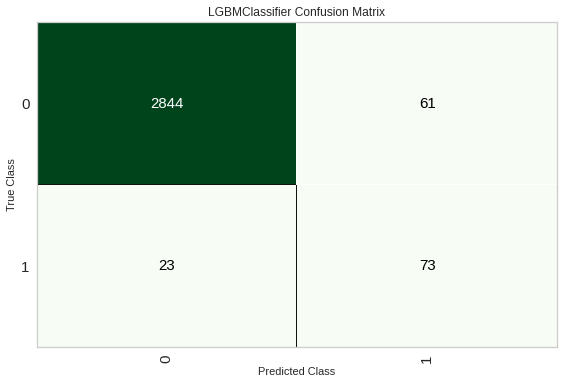

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plotando matriz de confusão
plot_model(tuned_lightgbm, plot='confusion_matrix')

A Matriz de Confusão também mostra que nosso modelo faz um bom trabalho na classificação para ambas as classes. Podendo elevar seu desempenho na medida em que o *dataframe* obtiver mais dados destes tipos de falhas.

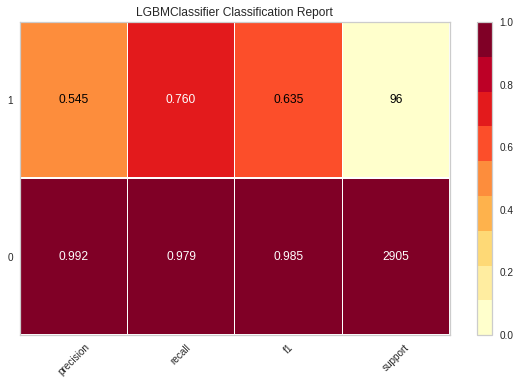

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# gerando o relatório de classificação
plot_model(tuned_lightgbm, plot='class_report')

O modelo fez um ótimo trabalho sobre as ambas as classes. Outra visualização importante de análise do nosso modelo é conhecida como Precision Recall Curve.

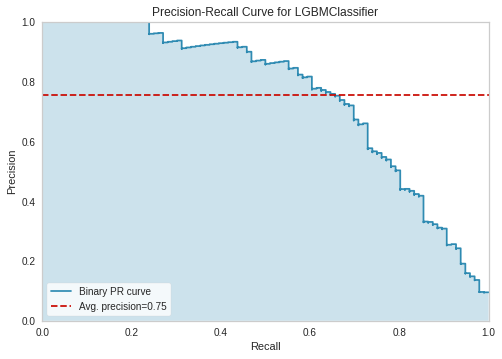

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# curva de Precision Recall
plot_model(tuned_lightgbm, plot = 'pr')

A curva PR obteve uma precisão média em torno de 0,80, o que é um bom desempenho.

Outra visualização extremamente importante é a de `feature_importances`. Essa visualização basicamente nos mostra qual a importância de cada uma das variáveis para o resultado do modelo.

Em outras palavras, estamos medindo o poder preditivo de cada variável.

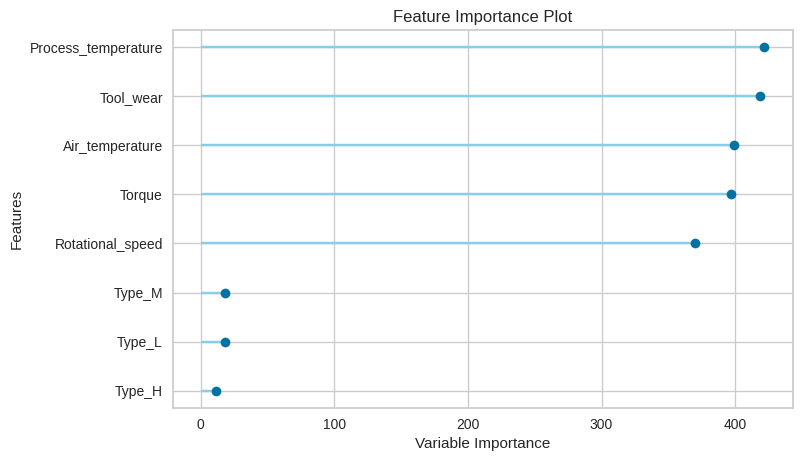

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# feature importances
plot_model(tuned_lightgbm, plot='feature')

Aqui, também podemos utilizar essa visualização interativa, que nos ajuda a entender melhor a performance de nosso modelo a partir de diferentes tipos de avaliação.

In [ ]:
# avaliando o modelo
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=50, n_jobs=-1, num_leaves=256, objective=None,
               random_state=7670, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalizando o Modelo

Agora que já conseguimos instanciar, treinar e avaliar nosso modelo, é hora de fazer previsões no nosso conjunto de testes.

In [ ]:
# fazendo previsões
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=50, n_jobs=-1, num_leaves=256, objective=None,
               random_state=7670, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.972,0.9752,0.7604,0.5448,0.6348,0.6206,0.63


In [ ]:
# finalizando o modelo
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=50, n_jobs=-1, num_leaves=256, objective=None,
               random_state=7670, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
     

In [ ]:
# verificando os parâmetros
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=50, n_jobs=-1, num_leaves=256, objective=None,
               random_state=7670, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [ ]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_lightgbm, data=test)
# test_preds.head(30)
test_preds[test_preds["Failure_binary"] == 1]

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.5, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=1.0,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=50, n_jobs=-1, num_leaves=256, objective=None,
               random_state=7670, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.999,0.9999,1.0,0.9737,0.9867,0.9861,0.9862


,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_L,Type_M,Type_H,Failure_binary,Label,Score
26,27.75,38.05,1288,69.6,62,1,0,0,1,1,0.9990
60,30.75,39.05,1330,53.7,200,0,1,0,1,1,0.9805
63,25.95,36.45,1354,53.9,207,1,0,0,1,1,0.9998
80,29.75,38.25,1373,48.0,73,0,1,0,1,1,0.9971
126,31.85,40.75,1363,62.5,200,1,0,0,1,1,0.9998
144,30.15,37.95,1321,52.7,134,1,0,0,1,1,0.9999
188,29.45,38.65,1355,57.8,195,1,0,0,1,1,0.9971
215,25.35,36.15,2564,12.8,127,1,0,0,1,1,0.9989
261,30.85,39.05,1374,48.2,65,1,0,0,1,1,0.9992
324,30.55,38.35,1351,41.8,10,1,0,0,1,1,0.9853


Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `joblib.dump` conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [ ]:
# salvando o modelo como um pickle em um arquivo
joblib.dump(final_lightgbm, 'classifier_binary.pkl')

['classifier_binary.pkl']

In [ ]:
# verificando a versão
sklearn.__version__

'0.23.2'

In [ ]:
# verificando a versão
!python --version

Python 3.8.16


Uma vez que você exporta o seu modelo, é extremamente importante que você também salve os nomes das *features* que esse modelo espera receber, e tem que ser na ordem exata que ele foi treinado.

Da mesma maneira que fizemos com o modelo, salvei os nomes das variáveis em `features_simples.names`.

In [ ]:
# salvar os nomes das features do modelo simples
features = test.columns.values
dump(features, 'features_binary.names') 

['features_binary.names']

# Modelo de Auto Machine Learning: Failure Target (multiclasse)

Com os dados formatados e analisados, vamos começar a fazer as previsões. Conforme descrito inicialmente, vamos aplicar auto machine learning primeiramente sobre a variável alvo `Failure Multiclass`. Como ferramenta da auto machine learning, utilizaremos o PyCaret.

### Treinando o modelo

Lembre-se que os dados de teste não podem ser usados para **treinar** o modelo. Quando estivermos com nosso modelo pronto, aí sim, usaremos o modelo de teste para fazer previsões.

Por isso, já iremos realizar o split.

In [ ]:
# separando os dados em teste e treino
test = df_multiclass.sample(frac=0.10)
train = df_multiclass.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [ ]:
# verificando o formato dos conjuntos
print(train.shape)
print(test.shape)

(9000, 9)
(1000, 9)


### Configurando o ambiente no PyCaret

Agora, vamos passar os nossos dados para o PyCaret, para começarmos a explorar os dados e preparar nosso modelo.

Aqui, vamos criar um classificador (clf), e vamos passar os dados, e a variável alvo.

In [ ]:
# criando o setup do PyCaret
clf = setup(data=train, target='Failure_multiclass')

,Description,Value
0,session_id,7153
1,Target,Failure_multiclass
2,Target Type,Multiclass
3,Label Encoded,"Heat Dissipation Failure: 0, No Failure: 1, Ov..."
4,Original Data,"(9000, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Failure_multiclass',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'p

### Criando um Pipeline
Através do *setup* vamos passar cada etapa do nosso pipeline. 

Dessa forma, iremos facilitar nosso trabalho, além de já estarmos preparando esse pipeline para uso em deploy, por exemplo.

A função de *setup* no PyCaret é a função mais importante, pela qual executamos todas as nossas etapas de pré-processamento de dados. 

* `data`: dados para modelagem;
* `target`: coluna de destino que queremos prever, neste caso, é diabética ou não;
* `fix_impalance`:
* `normalize`: modelos de aprendizado de máquina funcionam bem quando os recursos de entrada não têm grande variação. É importante dimensionar, portanto, usamos o parâmetro normalizar.
* `low variance`: às vezes, um conjunto de dados pode ter um recurso categórico com vários níveis, onde a distribuição de tais níveis é distorcida e um nível pode dominar sobre outros níveis. Isso significa que não há muita variação nas informações fornecidas por tal recurso. Para um modelo de ML, esse recurso pode não adicionar muitas informações e, portanto, pode ser ignorado para modelagem. Isso pode ser alcançado no PyCaret usando o parâmetro `ignore_low_variance`;
* `multicollinearity`: quando os dados são altamente correlacionados, nossos algoritmos tendem a não generalizar muito bem, por isso é importante remover a multicolinearidade usando os parâmetros `remove_multicollinearity` e `multicollinearity_threshold` na configuração;
* `log experiment`: .


In [ ]:
# criando o pipeline
clf = setup(data = df_multiclass,
            target = 'Failure_multiclass',
            fix_imbalance=True,
            normalize = True,
            ignore_low_variance = True,
            remove_multicollinearity = True,
            multicollinearity_threshold = 0.95,
            log_experiment = True)

,Description,Value
0,session_id,3115
1,Target,Failure_multiclass
2,Target Type,Multiclass
3,Label Encoded,"Heat Dissipation Failure: 0, No Failure: 1, Ov..."
4,Original Data,"(10000, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='Failure_multiclass',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                n...
                ('fix_perfect', Remove_100(target='Failure_multiclass')

### Comparando os Modelos
Aqui, vamos comparar diferentes modelos, para verificar a performance deles em nosso conjunto de dados, baseado na métrica de avaliação de nossa escolha. 

Vamos preferir utilizar a Acurácia como métrica de avaliação. É um bom baseline, e caso tivéssemos mais informações sobre o problema, poderíamos beneficiar outra métrica, mas, em linhas gerais, para esse problema, a acurácia será satisfatória.

In [ ]:
# best = compare_models()
best = compare_models(sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9697,0.9320,0.6483,0.9818,0.9753,0.6381,0.6484,1.737
et,Extra Trees Classifier,0.9634,0.9351,0.5206,0.9695,0.9659,0.5185,0.5220,1.395
rf,Random Forest Classifier,0.9613,0.9445,0.5857,0.9737,0.9668,0.5503,0.5625,4.131
dt,Decision Tree Classifier,0.9533,0.8416,0.5794,0.9753,0.9636,0.4991,0.5182,0.244
gbc,Gradient Boosting Classifier,0.9170,0.9288,0.6798,0.9778,0.9447,0.3950,0.4606,39.070
knn,K Neighbors Classifier,0.9023,0.8676,0.5945,0.9675,0.9311,0.3237,0.3841,0.129
lr,Logistic Regression,0.7695,0.9499,0.7476,0.9741,0.8523,0.1922,0.3161,3.047
svm,SVM - Linear Kernel,0.7564,0.0000,0.7183,0.9709,0.8407,0.1816,0.3002,0.227
lda,Linear Discriminant Analysis,0.6397,0.9256,0.6944,0.9678,0.7555,0.1166,0.2338,0.075
ridge,Ridge Classifier,0.6371,0.0000,0.6491,0.9652,0.7512,0.1128,0.2270,0.041


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3115, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
# verificando o melhor modelo
print(best)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3115, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [ ]:
# verificando os modelos
models()

INFO:logs:gpu_param set to False


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


### Instanciando o Modelo
Agora que vimos qual modelo para nosso problema, é hora de instanciar o modelo, e fazer o tuning de parâmetros, para que tenhamos o melhor resultado possível.

Por padrão, o PyCaret já faz a divisão dentro do conjunto de treino em conjuntos de validação, para trabalhar com 10 folds de validação.

Podemos ver isso abaixo:

In [ ]:
# instanciando o modelo
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9757,0.9889,0.7741,0.9903,0.9825,0.7229,0.7401
1,0.9657,0.9271,0.6222,0.9770,0.9710,0.5895,0.5985
2,0.9757,0.9261,0.6223,0.9830,0.9790,0.6942,0.6999
3,0.9600,0.9120,0.6404,0.9813,0.9701,0.5706,0.5915
4,0.9700,0.8863,0.6378,0.9794,0.9743,0.6288,0.6354
5,0.9671,0.8920,0.6764,0.9812,0.9734,0.6131,0.6242
6,0.9729,0.9415,0.5735,0.9787,0.9754,0.6330,0.6343
7,0.9700,0.9583,0.6627,0.9822,0.9758,0.6467,0.6582
8,0.9714,0.9445,0.6431,0.9842,0.9773,0.6523,0.6607


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3115, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
# verificando os parâmetros
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3115, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Hyperparameter Tuning

Utilizando o PyCaret também é extremamente fácil fazer a otimização dos parâmetros. Basta utilizar o método `tune_model` passando como parâmetro o modelo a ser otimizado e a métrica pela qual você quer otimizar. Aí basta rodar e receber os resultados.

In [ ]:
# tuning de parâmetros
tuned_lightgbm = tune_model(lightgbm, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9671,0.9812,0.6967,0.9837,0.9749,0.6365,0.6555
1,0.9657,0.9229,0.6428,0.9775,0.9706,0.6086,0.6229
2,0.9800,0.9483,0.6105,0.9838,0.9814,0.7391,0.7424
3,0.9686,0.9244,0.6007,0.9791,0.9729,0.6111,0.6176
4,0.9743,0.8975,0.6386,0.9780,0.9759,0.6586,0.6606
5,0.9771,0.9189,0.6781,0.9791,0.9776,0.6965,0.6986
6,0.9686,0.9581,0.5411,0.9728,0.9706,0.5670,0.5676
7,0.9671,0.9571,0.6622,0.9826,0.9745,0.6251,0.6400
8,0.9586,0.9632,0.5842,0.9761,0.9666,0.5345,0.5489


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=3115, reg_alpha=0.001, reg_lambda=0.2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
# verificando os parâmetros
print(tuned_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=3115, reg_alpha=0.001, reg_lambda=0.2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


## Plotando o Modelo

Agora você já deve ter percebido que o PyCaret facilita cada parte do processo de Machine Learning, e a visualização dos resultados não poderia ser diferente.

É muito prático plotar uma matriz de confusão dos resultados, por exemplo.

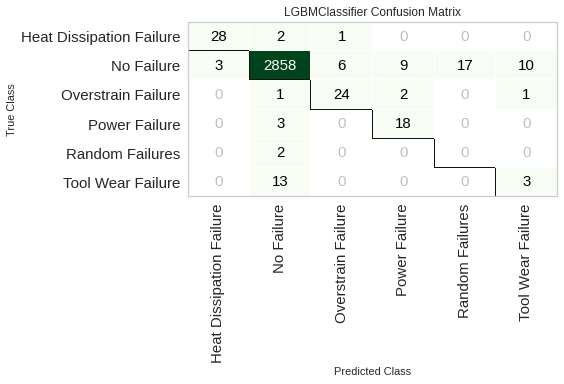

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plotando matriz de confusão
plot_model(tuned_lightgbm, plot='confusion_matrix')

A Matriz de Confusão também mostra que nosso modelo faz um bom trabalho na classificação para a maiora das classes. Importante considerarmos que o nosso *dataframe*, conforme visualizamos na etapa EDA, apresenta poucos casos de falha nos casos onde o modelo apresentou fraca acuracidade, podendo elevar seu desempenho na medida em que o *dataframe* obtiver mais dados desses tipos de falhas.

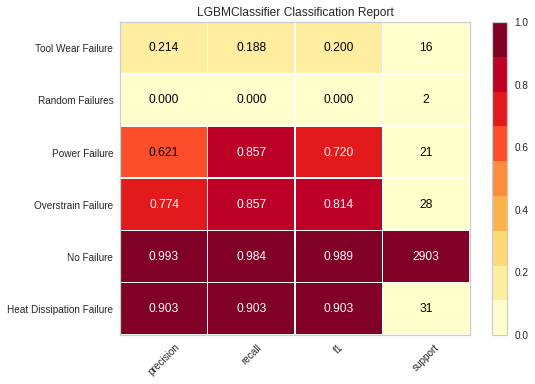

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# gerando o relatório de classificação
plot_model(tuned_lightgbm, plot='class_report')

O modelo fez um ótimo trabalho nas métricas para a maioria das classes. Outra visualização importante de análise do nosso modelo é conhecida como Precision Recall Curve.

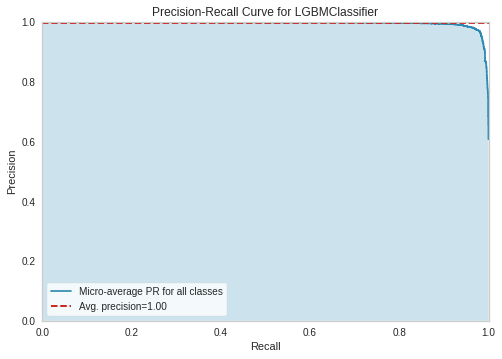

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# curva de Precision Recall
plot_model(tuned_lightgbm, plot = 'pr')

A curva PR obteve uma precisão média em torno de 0,99, o que é quase perfeito.

Outra visualização extremamente importante é a de `feature_importances`. Essa visualização basicamente nos mostra qual a importância de cada uma das variáveis para o resultado do modelo.

Em outras palavras, estamos medindo o poder preditivo de cada variável.

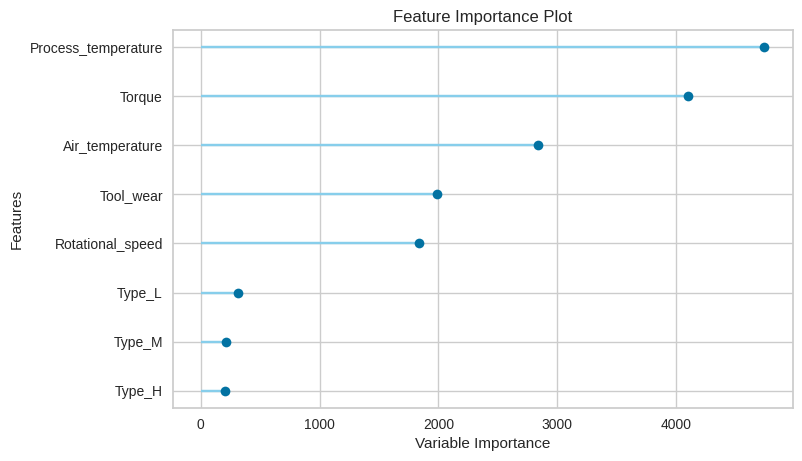

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# feature importances
plot_model(tuned_lightgbm, plot='feature')

Aqui, também podemos utilizar essa visualização interativa, que nos ajuda a entender melhor a performance de nosso modelo a partir de diferentes tipos de avaliação.

In [ ]:
# avaliando o modelo
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=3115, reg_alpha=0.001, reg_lambda=0.2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Finalizando o Modelo

Agora que já conseguimos instanciar, treinar e avaliar nosso modelo, é hora de fazer previsões no nosso conjunto de testes.

In [ ]:
# fazendo previsões
predict_model(tuned_lightgbm);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=3115, reg_alpha=0.001, reg_lambda=0.2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9767,0.9641,0.6316,0.9823,0.9793,0.6746,0.6789


In [ ]:
# finalizando o modelo
final_lightgbm = finalize_model(tuned_lightgbm)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=3115, reg_alpha=0.001, reg_lambda=0.2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
        

In [ ]:
# verificando os parâmetros
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=3115, reg_alpha=0.001, reg_lambda=0.2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


In [ ]:
# fazendo previsões com conjunto de teste
test_preds = predict_model(final_lightgbm, data=test)
test_preds[test_preds["Failure_multiclass"] != "No Failure"]

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMClassifier(bagging_fraction=0.6, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=86, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=250, n_jobs=-1, num_leaves=30, objective=None,
               random_state=3115, reg_alpha=0.001, reg_lambda=0.2,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.0,1.0,0,0,0,0,0


,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear,Type_L,Type_M,Type_H,Failure_multiclass,Label,Score
107,30.45,39.45,1227,68.2,187,0,1,0,Overstrain Failure,Overstrain Failure,0.9647
131,26.75,37.65,1287,61.9,216,1,0,0,Overstrain Failure,Overstrain Failure,0.9953
190,28.15,39.55,1545,43.5,160,1,0,0,Random Failures,Random Failures,0.7789
214,30.85,39.15,1365,56.2,146,1,0,0,Heat Dissipation Failure,Heat Dissipation Failure,0.9975
284,31.25,39.75,1298,63.9,59,1,0,0,Heat Dissipation Failure,Heat Dissipation Failure,0.9903
328,30.15,37.95,1353,50.9,36,1,0,0,Heat Dissipation Failure,Heat Dissipation Failure,0.9852
338,29.85,38.35,1263,60.6,90,1,0,0,Heat Dissipation Failure,Heat Dissipation Failure,0.8187
343,26.25,37.35,2153,15.3,98,1,0,0,Power Failure,Power Failure,0.7989
360,25.05,35.75,1326,75.4,172,1,0,0,Power Failure,Power Failure,0.9998
408,25.85,36.55,1268,69.4,189,1,0,0,Power Failure,Power Failure,0.9995


Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `joblib.dump` conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [ ]:
# salvando o modelo como um pickle em um arquivo
joblib.dump(final_lightgbm, 'classifier_binary.pkl')

['classifier_multiclass.pkl']

Uma vez que você exporta o seu modelo, é extremamente importante que você também salve os nomes das *features* que esse modelo espera receber, e tem que ser na ordem exata que ele foi treinado.

Da mesma maneira que fizemos com o modelo, salvei os nomes das variáveis em `features_simples.names`.

In [ ]:
# salvar os nomes das features do modelo simples
features = test.columns.values
dump(features, 'features_multiclass.names') 

['features_multiclass.names']

# Deploy do modelo

O deploy de um modelo nada mais é que um processo onde disponibilizamos um modelo de machine learning para outras pessoas, e é justamente nessa etapa que vemos como o modelo se torna um produto.

Sendo assim, nesta etapa disponibilizei um web app deste estudo, a fim de faciliar a simulação de classificação de falhas em equipamentos sobre novos dados.

Para este deploy foi utilizado o [Streamlit](https://brunoazambuja-classificacao-com-automl-e-maintenance-app-8ipklo.streamlit.app/), pelo qual é possível acessar a interface descrita.

# Conclusão do estudo

Quanto ao desempenho dos modelos de *machine learning*, em ambos os *targets* dos modelos, tanto o *target* de falha do tipo binária, que indica se há ou não uma falha, como o *target* de falhas do tipo multiclasse, que indica quais os tipos de falhas os produtos podem apresentar, obtivemos um desempenho em um patamar satisfatório, atendendo os objetivos propostos para este estudo.

Além disso, a *exploratoty data analysis (EDA)* proporcionou diversos insights efetivos quanto aos objetivos propostos neste estudo, podendo contribuir significativamente quanto ao direcionamento dos parâmetros de processo mais adequados para o negócio. Desta forma, o EDA mostrou o quanto pode ser uma etapa produtiva quando se fala em soluções de problemas e melhoria de desempenho do negócio.